# Decicion Tree explain

In [4]:
%load_ext autoreload
%autoreload 2
%pylab inline

from collections import defaultdict, OrderedDict, Counter
import copy
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
from datetime import date, datetime
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


/home/tomas/.pyenv/versions/3.7.0/envs/py3.7/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime', 'copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Load

In [5]:
df_train = pd.read_csv("data/data_clean_train.csv")
df_dev = pd.read_csv("data/data_clean_dev.csv")

# Preprocess

In [118]:
def xy_split(df):
    """
    :param pd.DataFrame df:
    :return:
    """

    feature_names = ['Year', 'city mpg']    
    df_x = df[feature_names]
    
    class_names = ["cheap", "expensive"]
    s_y = df['MSRP'] > 30000
    s_y = s_y.map(lambda x: class_names[int(x)])

#     s_y = df['MSRP']

    return df_x.values, s_y.values.ravel(), feature_names

x_train, y_train, feature_names = xy_split(df_train)
x_dev, y_dev, _ = xy_split(df_dev) 

# Fit & eval

In [119]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, accuracy_score

model = DecisionTreeClassifier(max_depth=2)
# model = DecisionTreeRegressor(max_depth=2)
model.fit(x_train, y_train)

y_dev_pred = model.predict(x_dev)
acc = accuracy_score(y_dev, y_dev_pred)
acc

0.7821158690176322

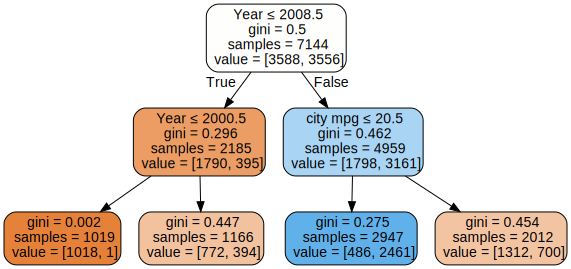

In [120]:
from sklearn.tree import export_graphviz
import graphviz 

dot_data = export_graphviz(model, out_file=None, 
                         feature_names=feature_names,  
                         #class_names=model.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True, proportion=False)  
graph = graphviz.Source(dot_data)
graph

- nodes - rules
- predction
- probabilities
- node values (class, samples, value)

# Gini impurity

\begin{equation*}
G = 1-\sum_{k=1}^{n}p_k^2
\end{equation*}

k ... třída

n ... počet tříd

# Training algorithm

- looking for rules split_feature <= th
- (split_feature, th) by purest subsets (lowest gini impurity) weighted by size
- [DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
- regularisation (later)

Advantages:
- requires little preprosessing

# Regression
- gini -> mse
- prediction: mean value

# Random forest
- more decision trees
- each tree trained on different subset of examples (uses bagging - bootstrap aggregating)
- each node made from random subset of features